# 기말고사 대비 정리

- toc : true
- hide : false
- published : true
- author : 이강철
- branch : true
- comment : true

## (9주차) 5월 1일

### import

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
import matplotlib.pyplot as plt

In [2]:
tnp.experimental_enable_numpy_behavior()

### MLE

* 우도 함수 : 특정 모수가 주어졌을 때 추출된 샘플들이 얻어질 확률(정확히는 가능도)을 계산하는 함수

* 확률이라는 말을 쓸 수 없는 이유는 다음과 같다. 

> example : $0.499 \leq p \leq 0.501$ 이라 정의 후 샘플 $x= [0,1,0,1]$이 얻어질 확률을 구해보자

$\divideontimes\,\,p : P(x=1)$ 

In [ ]:
_plist =  np.linspace(0.499,0.501,1000)
_prob = [(1-p)*p*(1-p)*p for p in _plist]

In [ ]:
sum(_prob)

62.49983299986714

* 확률은 주어진 표본 공간에서 모든 경우의 수에 대한 확률의 합이 1이되어야 한다. $\to$ 따라서 확률이라는 표현보다느 **"가능도"** 라는 표현을 쓰자

* 우리가 궁금한 것은 "$p=?$" 이다.

In [ ]:
_prob[:5]

[0.06249950000099999,
 0.06249950200099,
 0.06249950399697206,
 0.06249950598894615,
 0.062499507976912276]

* 위 리스트를 `_prob` 이라고 명명하였지만 사실은 `likelhood` 이다.

* 이를 $L(p)$ 라고 정의하자.

$$L(p) = \prod_{i=1}^n f(x_i;p)$$

* $L(p) : p$의 가능도 함수 $\to$ 모수$(p)$가 주어졌을 때 샘플 $(0,1,0,1)$이 얻어질 확률

* $MLE$ : $L(p)$를 최대로 하는 $\hat{p}$

$$\hat {p}_{mle} = \text {argmax}_{p}L(p)$$

* 로지스틱 회귀모형에서 $(w_0,w_1)$의 MLE를 구하는 것은 $BCELoss$를 최소화하는 $(w_0,w_1)$를 구하는 것과 동일하다.
  * 이거는 왜그런지 이해안될 때마다 수식써보자($\star\star\star$)

* 일단 회귀모형에서는 오차항이 정규분포를 따를 때 $-\log\,L(\beta_0,\beta_1)$을 통해 $MLE$ 구하는 것은 $MSE$를 통해 최적의 $\beta_0,\beta_1$을 추정하는 것과 같다.
  * 즉 $\boldsymbol {\beta}_{mle}=\boldsymbol {\beta}_{mse}$

* why? $\varepsilon =  (y-\boldsymbol{X\hat{\beta}})$ 

* 즉 오차항을 최소로하는 최적의 베타는 우도 함수에서 최대의 설명력을 가지기 때문이다~~

### 중간고사 3번 (overfit\)

* `3번 문제`에서 생성한 모형은 과적합이 아니다.
  * 회귀분석에서는 $n$이 커질수록 유의미하지 않은 변수가 0으로 추정된다.
  * 이러한 신기한 일이 일어나는 이유는 모든 설명변수가 직교하기 때문 $\to$ 이 수업에서는 그냥 설명변수들이 서로 독립이라고 생각하자
  * 이러한 모형의 장점 : overfit이 일어날 위험이 없으므로 `train/test`로 나누어 학습할 이유가 없다.(샘플만 버리는 꼴로, test빼둔 샘플까지 모아서 학습해 $\beta$를 좀 더 정확히 추론하는게 차라리 이득)
  * 이러한 모형에서 할일 : 추정된 계수들이 0인지 아닌지만 test하면 된다.(이것을 유의성 검정이라고 한다.)

### 색 표현

* 우리는 빨강, 노랑, 파랑으로 모든 색깔을 표현할 수 있다.($\star\star\star$)

* 그 이유는 빨강, 노랑, 파랑이 직교기저이기 때문이다.($\star\star\star$)

$$\text {color} =  \text{red}\times \beta_1+ \text{blue}\times \beta_2+ \text{yellow} \times\beta_3$$

### 경사하강법과 확률적 경사하강법

#### 경사하강법

* gradient descent : 한 번에 에폭에서 파라미터 업데이트시 모든 샘플을 이용

#### 확률적 경사하강법

* stochastic gradient descent
  * 예전 : 1 epoch $\to \text{sample_size}=1$
  * 현재 : 예전 1 epoch $\to \text{sample_size}=m\quad (m\leq n)$ 

#### 비교

* 전제 : 한번에 한 개의 파라미터를 업데이트 할 때
  * 메모리 사용량 : 경사하강법 > 확률적 경사하강법
  * 계산 속도 : 경사하강법 > 확률적 경사하강법
  * local_min에 갇힘 : 경사하강법 > 확률적 경사하강법 (이건 알고리즘 구성에 따라 달라짐)

* 경사하강법은 `local_min`을 잘 찾는다.
* 확률적 경사하강법은 운좋게 `local_min`을 탈출한다.

`-` 틀리진 않지만 어색한 블로그 내용들 정리

* 경사하강법은 종종 국소최소점의 갇히는 문제가 있다. 이를 해결하기 위해서 등장한 방법이 확률적 경사하강법이다.(X)
  * 틀린말은 아니나 이것을 의도하고 만든 것은 아님. 가끔 그럴 때도 있는 것이지 확률적 경사하강법을 쓴다고 `local_minimum`에 빠지지 않는 것은 아니다.


* 경사하강법은 계산 시간이 오래 걸린다(O). 계산을 빠르게 하기 위해서 등장한 방법이 확률적 경사하강법이다(O)
  * 1회 업데이트는 빠르게 계산하나, 그것이 최적의 $\beta$를 빠르게 얻을 수 있는 것은 아니다.

#### 결론

* 확률적 경사하강법을 쓰는 이유는 메모리적 문제이다. 메모리를 아끼기 위해 우리는 `tf.Variable`을 이용한다.

* 그런데 `Gradient`를 계산하려면 `loss`를 계산해야 하고 샘플 $(y, \hat y)$를 전부 메모리상에 올려야한다.

* 위 같은 경우 GPU가 샘플의 일부만 올라갈 수 있다면 미니배치방법인 확률적 경사하강법을 사용해야기 때문에 확률적 경사하강벙을 사용한다.

***

### fashion_mnist 모듈

#### 데이터 생성 및 탐색

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

* 60000은 샘플 수
* (28,28)은 픽셀을 의미한다.

* 첫 번째 관측값

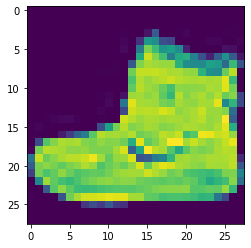

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

9

* 아 라벨 명이 `9`인 $y$는 신발임을 알 수 있다.

#### 로지스틱 모형 적합

* $y =0,1$에 대응하는 이미지만 추출해보자.

In [ ]:
train_y = y_train[(y_train==0)|(y_train==1)].reshape(-1,1)
test_y = y_test[(y_test==0)|(y_test==1)].reshape(-1,1)

train_x = x_train[(y_train==0)|(y_train==1)].reshape(-1,784)
test_x = x_test[(y_test==0)|(y_test==1)].reshape(-1,784)

##### 풀이 1: 은닉층을 포함한 신경망

* 은닉층 노드 개수 : 30
* 옵티마이저 : sgd
* 옵티마이저는 `sgd` 이나 배치사이즈를 `train_data`에 샘플사이즈로 하였기 때문에 경사하강법으로 취급한다.

In [ ]:
train_x.shape

(12000, 784)

In [ ]:
tf.random.set_seed(20222)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation="relu"))
net.add(tf.keras.layers.Dense(1,activation="sigmoid"))
net.compile(optimizer="sgd",loss=tf.losses.binary_crossentropy)
net.fit(train_x,train_y,epochs=100,verbose=0,batch_size=12000)

* train error

In [ ]:
np.mean((net(train_x)>0.5) == train_y)

<tf.Tensor: shape=(), dtype=float64, numpy=0.508>

* test error

In [ ]:
np.mean((net(test_x)>0.5) == test_y)

<tf.Tensor: shape=(), dtype=float64, numpy=0.508>

##### 풀이 2 : adam

In [ ]:
tf.random.set_seed(20222)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation="relu"))
net.add(tf.keras.layers.Dense(1,activation="sigmoid"))
net.compile(optimizer="adam",loss=tf.losses.binary_crossentropy)
net.fit(train_x,train_y,epochs=100,verbose=0,batch_size=12000)

* train error

In [ ]:
np.mean((net(train_x)>0.5) == train_y)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9819166666666667>

* test error

In [ ]:
np.mean((net(test_x)>0.5) == test_y)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9795>

##### 풀이 3 : metrics=["accuracy"]

In [ ]:
tf.random.set_seed(20222)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation="relu"))
net.add(tf.keras.layers.Dense(1,activation="sigmoid"))
net.compile(optimizer="adam",loss=tf.losses.binary_crossentropy,metrics=["accuracy"])
net.fit(train_x,train_y,epochs=100,verbose=0,batch_size=12000)

In [ ]:
net.evaluate(train_x,train_y)

375/375 [==============================] - 2s 3ms/step - loss: 0.4869 - accuracy: 0.9819


[0.4869031608104706, 0.9819166660308838]

In [ ]:
net.evaluate(test_x,test_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.9795


[0.6732255220413208, 0.9794999957084656]

##### 풀이 4 : 확률적 경사하강법 이용 epochs=10

* batch_size = 120
* 1 epoch $\to$ 100 iteration

In [ ]:
tf.random.set_seed(20222)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation="relu"))
net.add(tf.keras.layers.Dense(1,activation="sigmoid"))
net.compile(optimizer="adam",loss=tf.losses.binary_crossentropy,metrics=["accuracy"])
net.fit(train_x,train_y,epochs=100,verbose=0,batch_size=120)

In [ ]:
net.evaluate(train_x,train_y)

375/375 [==============================] - 1s 1ms/step - loss: 0.0303 - accuracy: 0.9955


[0.030314888805150986, 0.9955000281333923]

In [ ]:
net.evaluate(test_x,test_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9880


[0.1709846556186676, 0.9879999756813049]

***

## (10주차) 5월 9일

### import 

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.experimental.numpy as tnp

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

### softmax 함수

`1` 기존 로지스틱 vs 소프트 맥스 (이진 분류)

- $\bf {X} : (n x 784)$ 로 차원수 동일

- 로지스틱 $\bf {y_1,y_2} $ $\to$  (n,1), 소프트맥스 $\bf y =[{y_1,y_2}] \to (n,2
)$

* 로지스틱 :  $\bf {W}  \to (784,1)$ ,소프트맥스 : $\bf W= [ {W_1,W_2}] \to (784,2)$

* 로지스틱 : $b \to (n,1)$, 소프트맥스 $b= [b_1,b_2] \to (n, 2)$

* 소프트맥스 함수에서는 $bf XW+b$가 클수록 $\bf \hat {y} \approx 1$에 가깝다.

* 단순하게 소프트맥스함수를 기존 시그모이드(로지스틱)에 확장버전이라고 생각하자.

(문제) ${\bf X}{\bf W}_1 +b_1$ 의값이 500, ${\bf X}{\bf W}_2 +b_2$ 200인 개체가 있다고 하자  그렇다면 $\bf{y_1,y_2}$의 값은?

(답) :[1,0]

* 소프트맥스 함수 정의

$$a_i= {\bf XW}_i + b_i$$

$$y_k= \frac {\exp(a_k)}{\sum_{i=1}^n {\exp(a_i)}}  $$

### 다중클래스 분류


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


`-` 시도1. 간단한 신경망

* 인풋데이터의 차원변환을 꼭 기억하자

In [18]:
X =  x_train.reshape(-1,28*28) ## 
y = tf.keras.utils.to_categorical(y_train)
XX = x_test.reshape(-1,28*28)
yy = tf.keras.utils.to_categorical(y_test)

In [22]:
tf.random.set_seed(202150256)

net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Dense(30,activation="relu"))
net1.add(tf.keras.layers.Dense(10,activation="softmax"))
net1.compile(optimizer="adam",loss = tf.losses.categorical_crossentropy,metrics= ["accuracy"])
net1.fit(X,y,epochs=5,verbose=0)

In [20]:
net1.evaluate(XX,yy)

313/313 [==============================] - 1s 1ms/step - loss: 0.8055 - accuracy: 0.6909


[0.8054584860801697, 0.6909000277519226]

`-` 시도 2. 더 깊은 신경망

In [23]:
tf.random.set_seed(202150256)

net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Dense(500,activation="relu"))
net2.add(tf.keras.layers.Dense(500,activation="relu"))
net2.add(tf.keras.layers.Dense(10,activation="softmax"))
net2.compile(optimizer="adam",loss = tf.losses.categorical_crossentropy,metrics= ["accuracy"])
net2.fit(X,y,epochs=5,verbose=0)

In [24]:
net2.evaluate(XX,yy)

313/313 [==============================] - 1s 3ms/step - loss: 0.4814 - accuracy: 0.8245


[0.48135751485824585, 0.8245000243186951]

* 파라미터 수 비교

In [25]:
net1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (32, 30)                  23550     
                                                                 
 dense_10 (Dense)            (32, 10)                  310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [26]:
net2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 500)               392500    
                                                                 
 dense_12 (Dense)            (None, 500)               250500    
                                                                 
 dense_13 (Dense)            (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


### 모델 평가 지표 

* 표

| |퇴사(예측)|안나감(예측)|
|:-:|:-:|:-:|
|퇴사(실제)|TP|FN|
|안나감(실제)| FP| TN|

* Sensitivity = Recall
  * 정의 : 실제 참 중 예측한 참의 비율

$$\text {Sensitivity} = \frac {TP}{TP+FN}$$

* Precision(정밀도)
  * 정의 : 예측한 참 중 실제 참인 것의 비율

$$\text{Precision} = \frac{TP}{TP+FP}$$

* F1 score 
  * recall과 precision의 조화평균

$$\text {F1 score} =2\times  \frac {\text {Sensitivity} \times \text{Precision} }{\text{Sensitivity}+  \text{Precision}}$$

***

| |퇴사(예측)|안나감(예측)|
|:-:|:-:|:-:|
|퇴사(실제)|TP|FN|
|안나감(실제)| FP| TN|

(1) Specificity(특이도) : 실제 거짓인 것 중에 예측한 거짓의 비율

$$ \text {Specificity}=\frac {TN}{FP+TN}$$

(2) False Positive Rate = 1-특이도

 $$\text {FPR} = \frac {FP}{FP +TN}$$

* 이사람 퇴사할거라고 생사람 잡은 사람의 비율이라고 생각하자.

***

ROC curve 

`-` 정의 : $x=$ FPR, $y$ = TPR

* $x$축은 생사람 잡은 비율, $y$축은 실제로 잘 예측한 비율이다.

#### 다양한 지표 활용

`-` 방법 1

In [27]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(500,activation = 'relu'))
net.add(tf.keras.layers.Dense(500,activation = 'relu'))
net.add(tf.keras.layers.Dense(10,activation = 'softmax'))
net.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy','Recall'])
net.fit(X,y,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 2.2388 - accuracy: 0.7260 - recall: 0.6801
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.7772 - accuracy: 0.7279 - recall: 0.6207
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6440 - accuracy: 0.7523 - recall: 0.6443
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5876 - accuracy: 0.7613 - recall: 0.6462
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5377 - accuracy: 0.7968 - recall: 0.7188


In [28]:
net.evaluate(XX,yy)

313/313 [==============================] - 2s 4ms/step - loss: 0.5551 - accuracy: 0.8060 - recall: 0.7214


[0.5550734996795654, 0.8059999942779541, 0.7214000225067139]

`-` 방법 2

In [29]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(500,activation = 'relu'))
net.add(tf.keras.layers.Dense(500,activation = 'relu'))
net.add(tf.keras.layers.Dense(10,activation = 'softmax'))
net.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=[tf.metrics.CategoricalAccuracy(),tf.metrics.Recall()])
net.fit(X,y,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 2.2430 - categorical_accuracy: 0.7423 - recall: 0.6902
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6589 - categorical_accuracy: 0.7885 - recall: 0.7249
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5916 - categorical_accuracy: 0.8048 - recall: 0.7534
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5145 - categorical_accuracy: 0.8260 - recall: 0.7898
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4615 - categorical_accuracy: 0.8399 - recall: 0.8043


In [31]:
x_train.shape

(60000, 28, 28)

(28,28) 차원은 흑백이지라는 뜻이다.

* keras에서 이미지 자료는 (관측치 수, 픽셀, 픽셀, 채널) 형식을 가진다.

### 채널을 포함한 DNN

#### 예제 1

$X \to \text {Dense(30,relu)} \to \text{Dense(10, softmax)} \to y$

`-` 여지것 이러한 아키텍처를 돌리기 위해선 $X$의 shape을 미리 바꿔야 했다. 혹시 바꾸지 않는 방법도 있을까?

In [51]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

In [52]:
flttn = tf.keras.layers.Flatten()

In [53]:
X.shape

TensorShape([60000, 28, 28, 1])

In [54]:
flttn(X).shape

TensorShape([60000, 784])

* 위는 `X.reshpe(-1,28 x 28)`와 동일한 기능이다.

* 주의 : `flttn`은 신경망의 `layer`이다.

In [55]:
tf.random.set_seed(43052)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten()) ## layer추가된 모습
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])
net1.fit(X,y,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5431 - accuracy: 0.4038
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2042 - accuracy: 0.5173
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0222 - accuracy: 0.5878
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9312 - accuracy: 0.6192
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8973 - accuracy: 0.6270


In [56]:
net1.layers ## 첫번째 레이어가 flatten 레이어임을 확인

In [57]:
net1.layers[0](X) ## shape도 동일하게 적용되어있다.

<tf.Tensor: shape=(60000, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

* relu 적용

In [58]:
net1.layers[1](net1.layers[0](X)) ##

<tf.Tensor: shape=(60000, 30), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

* 소프트맥스 함수 적용

In [59]:
net1.layers[2](net1.layers[1](net1.layers[0](X)))

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0.0000000e+00, 2.8076959e-37, 0.0000000e+00, ..., 3.8582063e-04,
        0.0000000e+00, 9.9960333e-01],
       [2.0941226e-01, 1.4367345e-03, 2.3821327e-01, ..., 5.0225304e-03,
        2.5805481e-02, 3.0450234e-03],
       [3.0291098e-01, 1.3899502e-02, 2.2462834e-02, ..., 2.5782569e-15,
        2.1044535e-04, 2.6176517e-10],
       ...,
       [6.8422541e-02, 2.0148051e-01, 1.2838944e-05, ..., 0.0000000e+00,
        5.6517130e-10, 8.8627344e-27],
       [2.0941226e-01, 1.4367345e-03, 2.3821327e-01, ..., 5.0225304e-03,
        2.5805481e-02, 3.0450234e-03],
       [1.0189731e-34, 0.0000000e+00, 0.0000000e+00, ..., 1.7085880e-05,
        2.8456826e-20, 5.3099287e-05]], dtype=float32)>

#### 예제 2

$X \to \text {Dense(500,relu)}\to \text {Dense(500,relu)} \to \text{Dense(10, softmax)} \to y$

In [60]:
tf.random.set_seed(43052)
net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Flatten())
net2.add(tf.keras.layers.Dense(500,activation='relu'))
net2.add(tf.keras.layers.Dense(500,activation='relu'))
net2.add(tf.keras.layers.Dense(10,activation='softmax'))
net2.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])
net2.fit(X,y,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 2.2713 - accuracy: 0.7542
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6264 - accuracy: 0.7955
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5365 - accuracy: 0.8209
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4477 - accuracy: 0.8425
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4127 - accuracy: 0.8548


In [61]:
net1.evaluate(XX,yy)

313/313 [==============================] - 1s 1ms/step - loss: 0.9399 - accuracy: 0.6308


[0.9398639798164368, 0.6308000087738037]

In [62]:
net2.evaluate(XX,yy)

313/313 [==============================] - 1s 3ms/step - loss: 0.4849 - accuracy: 0.8357


[0.4849339425563812, 0.8356999754905701]

* 파라미터 증가대비 그렇게 큰 효과는 있어보이지 않은다. (예제 3은 모형이 너무 복잡해서 제외하였으니 예제 3까지 포함해서 생각한 경우이다.)

### 발상의 전환

* `MaxPoolin2D`, `MaxPool2D`를 이용

In [63]:
id(tf.keras.layers.MaxPooling2D), id(tf.keras.layers.MaxPool2D)

(136208416, 136208416)

In [68]:
mp = tf.keras.layers.MaxPool2D()

* 위 두 함수는 같은 기능을 하는 함수임을 알 수 있다.

`-` 테스트 1: (2,2) 이미지

In [64]:
XXX = tnp.arange(1*2*2*1).reshape(1,2,2,1)
XXX

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int64, numpy=
array([[[[0],
         [1]],

        [[2],
         [3]]]])>

* 채널때매 살짝 헷갈리지만 실제로는 이렇게 생긴 이미지이다.

In [67]:
XXX.reshape(1,2,2)

<tf.Tensor: shape=(1, 2, 2), dtype=int64, numpy=
array([[[0, 1],
        [2, 3]]])>

* 아래함수를 적용하면 4개의 값중 가장 큰 값이 나오는 것 같다.

In [69]:
mp(XXX)

<tf.Tensor: shape=(1, 1, 1, 1), dtype=int64, numpy=array([[[[3]]]])>

`-` 테스트 2 : (4,4) 이미지로 변경

In [72]:
XXX = tnp.arange(1*4*4*1).reshape(1,4,4,1)
XXX

<tf.Tensor: shape=(1, 4, 4, 1), dtype=int64, numpy=
array([[[[ 0],
         [ 1],
         [ 2],
         [ 3]],

        [[ 4],
         [ 5],
         [ 6],
         [ 7]],

        [[ 8],
         [ 9],
         [10],
         [11]],

        [[12],
         [13],
         [14],
         [15]]]])>

In [73]:
mp(XXX)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int64, numpy=
array([[[[ 5],
         [ 7]],

        [[13],
         [15]]]])>

In [74]:
mp(XXX).reshape(1,2,2)

<tf.Tensor: shape=(1, 2, 2), dtype=int64, numpy=
array([[[ 5,  7],
        [13, 15]]])>

* 아 `MaxPool2d`는 디폴트가 (2,2)사이즈의 윈도우라고 생각하고 4개의 값중 가장 큰값을 반환하는 함수임을 알 수 있다.

`-` 테스트 3 : (6,6) 이미지 + pool_size = (3,3)

In [77]:
XXX = tnp.arange(1*6*6*1).reshape(1,6,6,1)
XXX.reshape(1,6,6)

<tf.Tensor: shape=(1, 6, 6), dtype=int64, numpy=
array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]]])>

In [81]:
mp(XXX).reshape(1,3,3)

<tf.Tensor: shape=(1, 3, 3), dtype=int64, numpy=
array([[[ 7,  9, 11],
        [19, 21, 23],
        [31, 33, 35]]])>

In [82]:
mp3 = tf.keras.layers.MaxPool2D(pool_size= (3,3))
mp3(XXX)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int64, numpy=
array([[[[14],
         [17]],

        [[32],
         [35]]]])>

In [83]:
mp3(XXX).reshape(1,2,2)

<tf.Tensor: shape=(1, 2, 2), dtype=int64, numpy=
array([[[14, 17],
        [32, 35]]])>

***

## (11주차) 5월 11일

### import

In [84]:
import tensorflow as tf
import tensorflow.experimental.numpy as tnp

In [85]:
tnp.experimental_enable_numpy_behavior()

In [87]:
import matplotlib.pyplot as plt

### 지난주차 요약

* 모형을 아무리 복잡하게 해도 증가한 파라미터 개수 대비 그닥 성능의 개선이 그렇게 좋아지진 않았음.

* 이를 해결하기 위해 `Maxpool2D`를 잠깐 배움

### net3 : Conv2D + Maxpool2D

In [89]:
tf.random.set_seed(43052)
net3 = tf.keras.Sequential()
net3.add(tf.keras.layers.Conv2D(30,(2,2),activation='relu'))
net3.add(tf.keras.layers.MaxPool2D()) # net3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))와 동일한 코드
net3.add(tf.keras.layers.Conv2D(30,(2,2),activation='relu'))
net3.add(tf.keras.layers.MaxPool2D())
net3.add(tf.keras.layers.Flatten())
net3.add(tf.keras.layers.Dense(10,activation='softmax'))
net3.compile(loss=tf.losses.categorical_crossentropy,optimizer='adam',metrics='accuracy')
net3.fit(X,y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.7705 - accuracy: 0.8098
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3590 - accuracy: 0.8727
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3156 - accuracy: 0.8867
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2946 - accuracy: 0.8924
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2756 - accuracy: 0.9001
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2639 - accuracy: 0.9038
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2578 - accuracy: 0.9061
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2468 - accuracy: 0.9091
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2428 - accuracy: 0.9105
Epoch 10/10
1875/1875 [==============================] - 37s 20m

In [90]:
net3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 27, 27, 30)          150       
                                                                 
 max_pooling2d_2 (MaxPooling  (32, 13, 13, 30)         0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (32, 12, 12, 30)          3630      
                                                                 
 max_pooling2d_3 (MaxPooling  (32, 6, 6, 30)           0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (32, 1080)                0         
                                                                 
 dense_30 (Dense)            (32, 10)                

* 기존의 복잡한 신경망 파라미터의 1%만 사용하고도 보다 좋은 성능을 내었다.

In [91]:
net3.evaluate(XX,yy)

313/313 [==============================] - 5s 14ms/step - loss: 0.3205 - accuracy: 0.8856


[0.32054537534713745, 0.8855999708175659]

### 이어지는 테스트

`-` 테스트 4 : `padding = "same"`



In [95]:
m = tf.keras.layers.MaxPool2D(pool_size = (2,2))

In [96]:
XXX = tnp.arange(1*5*5*1).reshape(1,5,5,1)
XXX.reshape(1,5,5)

<tf.Tensor: shape=(1, 5, 5), dtype=int64, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]])>

* 기존의 방법 이용 시 차원이 안맞는 부분(9,19,24)의 경우 버리고 계산한다.

In [98]:
m(XXX).reshape(1,2,2)

<tf.Tensor: shape=(1, 2, 2), dtype=int64, numpy=
array([[[ 6,  8],
        [16, 18]]])>

* 옵션 추가

In [101]:
m=tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="same")

In [103]:
m(XXX).reshape(1,3,3)

<tf.Tensor: shape=(1, 3, 3), dtype=int64, numpy=
array([[[ 6,  8,  9],
        [16, 18, 19],
        [21, 23, 24]]])>

`-` 테스트 5 : 관측치 2개 + 채널은 흑백

In [104]:
m = tf.keras.layers.MaxPool2D(pool_size= (2,2))

In [106]:
XXX = tnp.arange(2*4*4*1).reshape(2,4,4,1)
XXX.reshape(2,4,4)

<tf.Tensor: shape=(2, 4, 4), dtype=int64, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]]])>

In [108]:
m(XXX).reshape(2,2,2)

<tf.Tensor: shape=(2, 2, 2), dtype=int64, numpy=
array([[[ 5,  7],
        [13, 15]],

       [[21, 23],
        [29, 31]]])>

`-` 테스트 6 : 채널 수 3개

In [109]:
XXX = tnp.arange(1*4*4*3).reshape(1,4,4,3)

In [111]:
XXX [:,:,:,0] ## 첫 번째 채널

<tf.Tensor: shape=(1, 4, 4), dtype=int64, numpy=
array([[[ 0,  3,  6,  9],
        [12, 15, 18, 21],
        [24, 27, 30, 33],
        [36, 39, 42, 45]]])>

In [112]:
m(XXX)

<tf.Tensor: shape=(1, 2, 2, 3), dtype=int64, numpy=
array([[[[15, 16, 17],
         [21, 22, 23]],

        [[39, 40, 41],
         [45, 46, 47]]]])>

In [113]:
m(XXX)[:,:,:,0]

<tf.Tensor: shape=(1, 2, 2), dtype=int64, numpy=
array([[[15, 21],
        [39, 45]]])>

### Conv2D

`-` 테스트 1

* 레이어 생성

In [114]:
cv = tf.keras.layers.Conv2D(1,kernel_size=(2,2))

`-` XXX 생성 $\to$ (1,4,4,1)

* 데이터 생성시 `float` 형으로 생성하고, `cv`에 데이터 전달시 `XXX.reshape(1,4,4)`로 전달하면 에러가 나니 주의하자.

* reshape을 해서 채널을  펼처서 보는 것은 그냥 내가 보기 편하려고 하는 것!!

In [115]:
XXX = tnp.arange(1*4*4*1,dtype= tf.float64).reshape(1,4,4,1)

In [116]:
XXX.reshape(1,4,4)

<tf.Tensor: shape=(1, 4, 4), dtype=float64, numpy=
array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]]])>

In [118]:
cv(XXX).reshape(1,3,3)

<tf.Tensor: shape=(1, 3, 3), dtype=float32, numpy=
array([[[ 3.5789468,  4.3211403,  5.063334 ],
        [ 6.547721 ,  7.289914 ,  8.032108 ],
        [ 9.516495 , 10.258689 , 11.000883 ]]], dtype=float32)>

* `cv` 레이어는 어떠한 사칙연산이나 `max`를 통한 return을 해주는 것 같진 않다.

* 또한 레이어의 가중치가 랜덤으로 배정되는 것 같음

In [125]:
tf.random.set_seed(202150256)
cv = tf.keras.layers.Conv2D(1,kernel_size=(2,2))
XXX = tnp.arange(1*4*4*1,dtype= tf.float64).reshape(1,4,4,1)
print(XXX.reshape(1,4,4))
print(cv(XXX).reshape(1,3,3))

tf.Tensor(
[[[ 0.  1.  2.  3.]
  [ 4.  5.  6.  7.]
  [ 8.  9. 10. 11.]
  [12. 13. 14. 15.]]], shape=(1, 4, 4), dtype=float64)
tf.Tensor(
[[[1.6186349 1.7818708 1.9451072]
  [2.2715797 2.434816  2.598052 ]
  [2.9245248 3.0877604 3.2509975]]], shape=(1, 3, 3), dtype=float32)


* 가중치 확인

In [127]:
cv.weights

[<tf.Variable 'conv2d_8/kernel:0' shape=(2, 2, 1, 1) dtype=float32, numpy=
 array([[[[-0.16480297]],
 
         [[ 0.14897054]]],
 
 
        [[[-0.57432115]],
 
         [[ 0.7533898 ]]]], dtype=float32)>,
 <tf.Variable 'conv2d_8/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

* 길이가 2인 리스트임을 확인

In [129]:
cv.weights[0]

<tf.Variable 'conv2d_8/kernel:0' shape=(2, 2, 1, 1) dtype=float32, numpy=
array([[[[-0.16480297]],

        [[ 0.14897054]]],


       [[[-0.57432115]],

        [[ 0.7533898 ]]]], dtype=float32)>

`-`연산 과정

In [134]:
XXX.reshape(1,4,4)

<tf.Tensor: shape=(1, 4, 4), dtype=float64, numpy=
array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]]])>

In [136]:
tf.reshape(cv.weights[0],(2,2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.16480297,  0.14897054],
       [-0.57432115,  0.7533898 ]], dtype=float32)>

In [138]:
-0.16480297*0 + 0.14897054*1 + -0.57432115*4 + 0.7533898*5 + 0 ## 0 은 bias

1.6186349400000002

* 가중치 변경
  * 가중치의 역할을 4개의 값에 평균값을 계산하기 위한 값으로 설정

In [139]:
w = tnp.array([1/4,1/4,1/4,1/4],dtype=tf.float32).reshape(2,2,1,1)
b = tnp.array([3],dtype=tf.float32)

In [140]:
cv.set_weights([w,b])

In [141]:
XXX.reshape(1,4,4)

<tf.Tensor: shape=(1, 4, 4), dtype=float64, numpy=
array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]]])>

In [143]:
cv(XXX).reshape(1,3,3)

<tf.Tensor: shape=(1, 3, 3), dtype=float32, numpy=
array([[[ 5.5,  6.5,  7.5],
        [ 9.5, 10.5, 11.5],
        [13.5, 14.5, 15.5]]], dtype=float32)>

In [145]:
tnp.mean([0,1,4,5])+3,  tnp.mean([1,2,5,6]) + 3 , tnp.mean([2,3,6,7])+ 3

(<tf.Tensor: shape=(), dtype=float64, numpy=5.5>,
 <tf.Tensor: shape=(), dtype=float64, numpy=6.5>,
 <tf.Tensor: shape=(), dtype=float64, numpy=7.5>)

#### Conv2D 요약

(1) size = (2,2)인 윈도우를 만든다.

(2) XXX에 윈도우를 통과시켜서 (2,2) 크기의 `sub XXX`를 얻음

(3) 각 원소에 `conv2d.weights[0]`의 각 원소를 `element-wise`하게 곱함.

(4) 위의 결과를 모두 더함

(5) 위 과정을 `window`를 이동시키면서 반복

`-` 테스트 2 : window_size = (3,3)

In [147]:
tf.random.set_seed(202150256)

cnv = tf.keras.layers.Conv2D(1,(3,3))

XXX = tnp.arange(1*5*5*1,dtype= tf.float64).reshape(1,5,5,1)

In [148]:
XXX.reshape(1,5,5)

<tf.Tensor: shape=(1, 5, 5), dtype=float64, numpy=
array([[[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.]]])>

In [153]:
cnv(XXX) ## 이렇게 한번 통과시켜주어야 가중치가 생성됨

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[2.0109696],
         [2.0234969],
         [2.036024 ]],

        [[2.0736065],
         [2.0861347],
         [2.0986617]],

        [[2.1362438],
         [2.1487725],
         [2.161299 ]]]], dtype=float32)>

In [155]:
tf.reshape(cnv.weights[0],(3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.10986865,  0.09931368, -0.38288075],
       [ 0.50225985, -0.37750602, -0.00236773],
       [ 0.539171  , -0.12314481, -0.13244906]], dtype=float32)>

In [162]:
XXX.reshape(1,5,5)[0,:3,:3] * tf.reshape(cnv.weights[0],(3,3))

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[-0.        ,  0.09931368, -0.76576149],
       [ 2.51129925, -2.26503611, -0.01657414],
       [ 5.3917098 , -1.35459286, -1.58938873]])>

`-` 테스트 3 : 가중치 변환

![](https://github.com/guebin/2021BDA/blob/master/_notebooks/2021-11-04-conv.png?raw=true)

In [170]:
XXX = tf.constant([[3,3,2,1,0],[0,0,1,3,1],[3,1,2,2,3],[2,0,0,2,2],[2,0,0,0,1]],dtype=tf.float64).reshape(1,5,5,1)
XXX.reshape(1,5,5)

<tf.Tensor: shape=(1, 5, 5), dtype=float64, numpy=
array([[[3., 3., 2., 1., 0.],
        [0., 0., 1., 3., 1.],
        [3., 1., 2., 2., 3.],
        [2., 0., 0., 2., 2.],
        [2., 0., 0., 0., 1.]]])>

* 가중치 설정

In [175]:
cnv = tf.keras.layers.Conv2D(1,(3,3))

In [178]:
cnv(XXX).reshape(1,3,3)

<tf.Tensor: shape=(1, 3, 3), dtype=float32, numpy=
array([[[-4.5177736, -4.7706876, -4.1997848],
        [-1.9933901, -2.4667392, -3.6786997],
        [-2.1282752, -2.0111198, -3.2808685]]], dtype=float32)>

In [181]:
cnv.weights[0].shape

TensorShape([3, 3, 1, 1])

In [179]:
_w = tf.constant([[0,1,2],[2,2,0],[0,1,2]],dtype=tf.float64).reshape(3,3,1,1)
_b = tf.constant([0],dtype=tf.float64)

In [180]:
cnv.set_weights([_w,_b])

In [182]:
cnv(XXX).reshape(1,3,3)

<tf.Tensor: shape=(1, 3, 3), dtype=float32, numpy=
array([[[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]]], dtype=float32)>

`-` 테스트 5 : 관측치는 고정(채널이 1개)이고 출력 채널이 바뀔 때 ($1 \to 4$)

In [185]:
tf.random.set_seed(202150256)
cnv = tf.keras.layers.Conv2D(4,(2,2))
XXX = tnp.arange(1*2*2*1,dtype=tf.float64).reshape(1,2,2,1)

In [186]:
XXX.reshape(1,2,2)

<tf.Tensor: shape=(1, 2, 2), dtype=float64, numpy=
array([[[0., 1.],
        [2., 3.]]])>

In [187]:
cnv(XXX)

<tf.Tensor: shape=(1, 1, 1, 4), dtype=float32, numpy=
array([[[[0.39856195, 2.3472311 , 1.7059407 , 0.48935118]]]],
      dtype=float32)>

* (2,2)는 커널의 크기, 1은 XXX의 채널 수, 4는 conv(XXX)의 채널 수

In [193]:
 cnv.weights

[<tf.Variable 'conv2d_14/kernel:0' shape=(2, 2, 1, 4) dtype=float32, numpy=
 array([[[[-0.10423055,  0.09421724, -0.36323258,  0.4764855 ]],
 
         [[-0.35813367, -0.00224626,  0.5115025 , -0.11682543]]],
 
 
        [[[-0.12565222,  0.4740168 , -0.05767503,  0.05986524]],
 
         [[ 0.33600003,  0.46714795,  0.4365961 ,  0.16214871]]]],
       dtype=float32)>,
 <tf.Variable 'conv2d_14/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

* 첫 번째 채널의 가중치 값

In [192]:
cnv.weights[0][...,0] ## 

<tf.Tensor: shape=(2, 2, 1), dtype=float32, numpy=
array([[[-0.10423055],
        [-0.35813367]],

       [[-0.12565222],
        [ 0.33600003]]], dtype=float32)>

* 첫 번째 채널에 대한 연산 수행

In [195]:
tf.reduce_sum(XXX.reshape(1,2,2) * cnv.weights[0][...,0].reshape(2,2))

<tf.Tensor: shape=(), dtype=float64, numpy=0.398561954498291>

* 채널을 4개로 늘렸다 $\to$ 사실상 아무의미없다 $\to$ 그냥 파라미터를 많이 써서 뻥튀기 한것이다.

* 즉, 원래 채널은 3개 지만 그냥 모델을 복잡하게 해서 뻥튀기를 한 것이다.

`-` 테스트 6 : 관측치의 채널이 여러개, Conv의 채널도 여러개

* weight들의 값을 바로 보기위해 XXX의 값을 1로 통일!!

In [208]:
tf.random.set_seed(202150256)
cnv = tf.keras.layers.Conv2D(4, kernel_size = (2,2))
XXX = tnp.array([1]*1*2*2*1,dtype=tf.float64).reshape(1,2,2,1)

In [209]:
XXX.reshape(1,2,2)

<tf.Tensor: shape=(1, 2, 2), dtype=float64, numpy=
array([[[1., 1.],
        [1., 1.]]])>

In [210]:
 cnv(XXX)

<tf.Tensor: shape=(1, 1, 1, 4), dtype=float32, numpy=
array([[[[-0.25201643,  1.0331357 ,  0.527191  ,  0.581674  ]]]],
      dtype=float32)>

In [211]:
cnv.weights[0][...,0] ## 첫번째 채널의 가중치

<tf.Tensor: shape=(2, 2, 1), dtype=float32, numpy=
array([[[-0.10423055],
        [-0.35813367]],

       [[-0.12565222],
        [ 0.33600003]]], dtype=float32)>

* 값이 동일한지 확인

In [213]:
tf.reduce_sum(cnv.weights[0][...,0]) == tf.reduce_sum(XXX.reshape(1,2,2)*cnv.weights[0][...,0].reshape(2,2))

<tf.Tensor: shape=(), dtype=bool, numpy=True>

* 자 이제 인풋데이터의 채널을 늘린 후 적용

In [241]:
tf.random.set_seed(43052)
cnv = tf.keras.layers.Conv2D(4,kernel_size=(2,2))
XXX = tnp.array([1]*1*2*2*3,dtype=tf.float64).reshape(1,2,2,3) ## X의 채널 차원 수를 늘림

In [ ]:
cnv(XXX)

In [244]:
cnv.weights

[<tf.Variable 'conv2d_18/kernel:0' shape=(2, 2, 3, 4) dtype=float32, numpy=
 array([[[[-0.06956434, -0.12789628, -0.10784459, -0.32920673],
          [-0.30761963,  0.06209785, -0.07421023,  0.3941219 ],
          [ 0.16699678, -0.38913035, -0.13020593, -0.29443866]],
 
         [[ 0.28664726, -0.0697116 ,  0.09893084, -0.4221446 ],
          [-0.23161241, -0.16410837, -0.36420006,  0.12424195],
          [-0.14245945,  0.36286396, -0.10751781,  0.1733647 ]]],
 
 
        [[[ 0.02764335,  0.15547717, -0.42024496, -0.31893867],
          [ 0.22414821,  0.3619454 , -0.00282967, -0.3503708 ],
          [ 0.4610079 , -0.17417148,  0.00401336, -0.29777044]],
 
         [[-0.1620284 , -0.42066965, -0.01578814, -0.4240524 ],
          [ 0.37925082,  0.24236053,  0.3949356 , -0.20996472],
          [-0.30264795, -0.28889188, -0.3237777 ,  0.37506342]]]],
       dtype=float32)>,
 <tf.Variable 'conv2d_18/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

In [245]:
cnv(XXX).reshape(4)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.3297621 , -0.44983467, -1.0487392 , -1.5800949 ], dtype=float32)>

In [247]:
tf.reduce_sum(cnv.weights[0][...,0]) == cnv(XXX).reshape(4)[0]

<tf.Tensor: shape=(), dtype=bool, numpy=True>

* 위 값의 `True`를 살펴보자.
  * 현재 우리는 채널을 뻥튀기 했다. 굳이 안해도 되는데?
  * 우리가 의도한바는 뻥뒤기 된 채널은 아무의미없고 그 중 유의미한 피쳐가 있을 것이라고 기대만 하는 것이다.
  * 즉, 입력 데이터가 고양이인지, 강아지인지 그 중에 하나 걸려라 느낌

In [255]:
w_red = cnv.weights[0][...,0][...,0] 
w_green = cnv.weights[0][...,0][...,1] 
w_blue = cnv.weights[0][...,0][...,2] 

In [256]:
w_red

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.06956434,  0.28664726],
       [ 0.02764335, -0.1620284 ]], dtype=float32)>

In [257]:
cnv(XXX)

<tf.Tensor: shape=(1, 1, 1, 4), dtype=float32, numpy=
array([[[[ 0.3297621 , -0.44983467, -1.0487392 , -1.5800949 ]]]],
      dtype=float32)>

In [258]:
tf.reduce_sum(XXX[...,0] * w_red + XXX[...,1] * w_green + XXX[...,2] * w_blue) ## cnv(XXX)의 첫채널 출력결과 

<tf.Tensor: shape=(), dtype=float64, numpy=0.32976213097572327>

#### 숙제 

다음 이미지에 [-1,-1,1,1] weight를 적용하여 컨볼루션 연산결과를 계산하라.

In [298]:
XXX = tf.constant([0,0,0,1,1,1]*6,dtype=tf.float64).reshape(1,6,6,1)

In [304]:
XXX.reshape(1,6,6)

<tf.Tensor: shape=(1, 6, 6), dtype=float64, numpy=
array([[[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.]]])>

In [305]:
cnv = tf.keras.layers.Conv2D(1,kernel_size=(2,2))

In [306]:
cnv(XXX).reshape(1,5,5)

<tf.Tensor: shape=(1, 5, 5), dtype=float32, numpy=
array([[[0.        , 0.        , 0.23617882, 0.6081579 , 0.6081579 ],
        [0.        , 0.        , 0.23617882, 0.6081579 , 0.6081579 ],
        [0.        , 0.        , 0.23617882, 0.6081579 , 0.6081579 ],
        [0.        , 0.        , 0.23617882, 0.6081579 , 0.6081579 ],
        [0.        , 0.        , 0.23617882, 0.6081579 , 0.6081579 ]]],
      dtype=float32)>

#### 가중치 설정

In [301]:
cnv.weights[0].shape

TensorShape([2, 2, 1, 1])

In [312]:
_w =  tnp.array([-1,1,-1,1],dtype=tf.float32).reshape(2,2,1,1)
_b = tnp.array([0],dtype=tf.float32)

In [311]:
_w.reshape(2,2)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.,  1.],
       [-1.,  1.]], dtype=float32)>

In [315]:
cnv.set_weights([_w,_b])

In [316]:
_w.reshape(2,2)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.,  1.],
       [-1.,  1.]], dtype=float32)>

In [318]:
cnv(XXX).reshape(1,5,5)

<tf.Tensor: shape=(1, 5, 5), dtype=float32, numpy=
array([[[0., 0., 2., 0., 0.],
        [0., 0., 2., 0., 0.],
        [0., 0., 2., 0., 0.],
        [0., 0., 2., 0., 0.],
        [0., 0., 2., 0., 0.]]], dtype=float32)>

***